# Equipe


*   Valéria Ribeiro dos Santos
*   Marcos Costa Antunes Afonso
*   Miguel Angelo Oliveira
*   Kaique Olegar Amaro



## Redes Neurais Artificiais 2024.1

- **Disciplina**: Redes Neurais Artificiais 2024.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  

    3.1 O que é cada exemplo na base de dados?  
    3.2 Em que ano ela foi obtida?  
    3.3 Quem foram os responsáveis pela criação desta base de dados?  

**3.1.** Cada exemplo na base de dados é uma observação de quatro áreas de Roosevelt National Forest, no Colorado. Cada observação inclui variáveis cartográficas de seções de 30 metros x 30 metros da floresta, as quais fornecem informações sobre o tipo de árvore, cobertura de sombra, distância até pontos de referência próximos (como estradas), tipo de solo e topografia local.

**3.2.** A base de dados foi disponibilizada em 31 de julho de 1998.

**3.3.** Os responsáveis pela criação desta base de dados são Jock A. Blackard, Dr. Denis J. Dean e Dr. Charles W. Anderson, que estavam associados ao Programa de Sensoriamento Remoto e GIS da Universidade do Estado do Colorado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [ ]:
traducao = {
    "Elevation": "Elevação",
    "Aspect": "Orientação",
    "Slope": "Declive",
    "Horizontal_Distance_To_Hydrology": "Distância Horizontal à Hidrologia",
    "Vertical_Distance_To_Hydrology": "Distância Vertical à Hidrologia",
    "Horizontal_Distance_To_Roadways": "Distância Horizontal às Estradas",
    "Hillshade_9am": "Sombra às 9h",
    "Hillshade_Noon": "Sombra às 12h",
    "Hillshade_3pm": "Sombra às 15h",
    "Horizontal_Distance_To_Fire_Points": "Distância Horizontal aos Pontos de Fogo",
    "Wilderness_Area": "Área_Selvagem",
    "Soil_Type": "Tipo de Solo",
    "Cover_Type": "Tipo de Cobertura"
}


### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

In [ ]:
!wget https://github.com/marcos-costa/MLP_Covertype/raw/main/covtype.zip
!unzip covtype.zip

df = pd.read_csv('covtype.csv')

--2024-06-23 18:38:03--  https://github.com/marcos-costa/MLP_Covertype/raw/main/covtype.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcos-costa/MLP_Covertype/main/covtype.zip [following]
--2024-06-23 18:38:04--  https://raw.githubusercontent.com/marcos-costa/MLP_Covertype/main/covtype.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12143401 (12M) [application/zip]
Saving to: ‘covtype.zip’

covtype.zip         100%[===================>]  11.58M  --.-KB/s    in 0.1s    

2024-06-23 18:38:04 (92.7 MB/s) - ‘covtype.zip’ saved [12143401/12143401]

Archive:  covtype.zip
  inflating: covty

In [ ]:
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581002,2419,168,25,108,33,124,230,240,126,812,...,0,0,0,0,0,0,0,0,0,3
581003,2415,161,25,95,29,120,236,237,116,815,...,0,0,0,0,0,0,0,0,0,3
581004,2410,158,24,90,24,120,238,236,115,819,...,0,0,0,0,0,0,0,0,0,3
581005,2405,159,22,90,19,120,237,238,119,824,...,0,0,0,0,0,0,0,0,0,3
581006,2401,157,21,90,15,120,238,238,119,830,...,0,0,0,0,0,0,0,0,0,3
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
print(f'Há {df.shape[0]} exemplos no dataset')

Há 581012 exemplos no dataset


In [ ]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [ ]:
if df.isnull().values.any():
  print('Há dados faltantes no dataset')
else:
  print('Não há dados faltantes no dataset')

Não há dados faltantes no dataset


**7** Os atributos do tipo "Soil Type" representam diferentes tipos de solo encontrados nas seções da floresta observadas. No dataset, há vários atributos binários que indicam a presença ou ausência de um tipo específico de solo em uma seção de 30 metros x 30 metros da floresta.

**7.1** Este atributo é qualitativo, pois a presença de diferentes tipos de solo é uma característica categórica.

**7.2** Os atributos do tipo "Soil Type" utilizam uma codificação chamada One-Hot Encoding. Nesta codificação, cada categoria do atributo é representada por uma coluna binária separada (0 ou 1), facilitando a utilização desses dados em modelos de Machine Learning.




### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
    1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
    1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
    3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
    3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

In [ ]:
soloColunas = [col for col in df.columns if col.startswith('Soil_Type')]
florestaColunas = [col for col in df.columns if col.startswith('Wilderness_Area')]

def undoOneHotEncoding(row, columns):
    for col in columns:
        if row[col] == 1:
            return col
    return np.nan

df['Soil_Type'] = df.apply(lambda row: undoOneHotEncoding(row, soloColunas), axis=1)
df['Wilderness_Area'] = df.apply(lambda row: undoOneHotEncoding(row, florestaColunas), axis=1)

df = df.drop(columns = soloColunas + florestaColunas)

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,Soil_Type29,Wilderness_Area1
1,2590,56,2,212,-6,390,220,235,151,6225,5,Soil_Type29,Wilderness_Area1
2,2804,139,9,268,65,3180,234,238,135,6121,2,Soil_Type12,Wilderness_Area1
3,2785,155,18,242,118,3090,238,238,122,6211,2,Soil_Type30,Wilderness_Area1
4,2595,45,2,153,-1,391,220,234,150,6172,5,Soil_Type29,Wilderness_Area1


In [ ]:
preditores = df.drop(columns=['Cover_Type'])
alvo = df['Cover_Type']

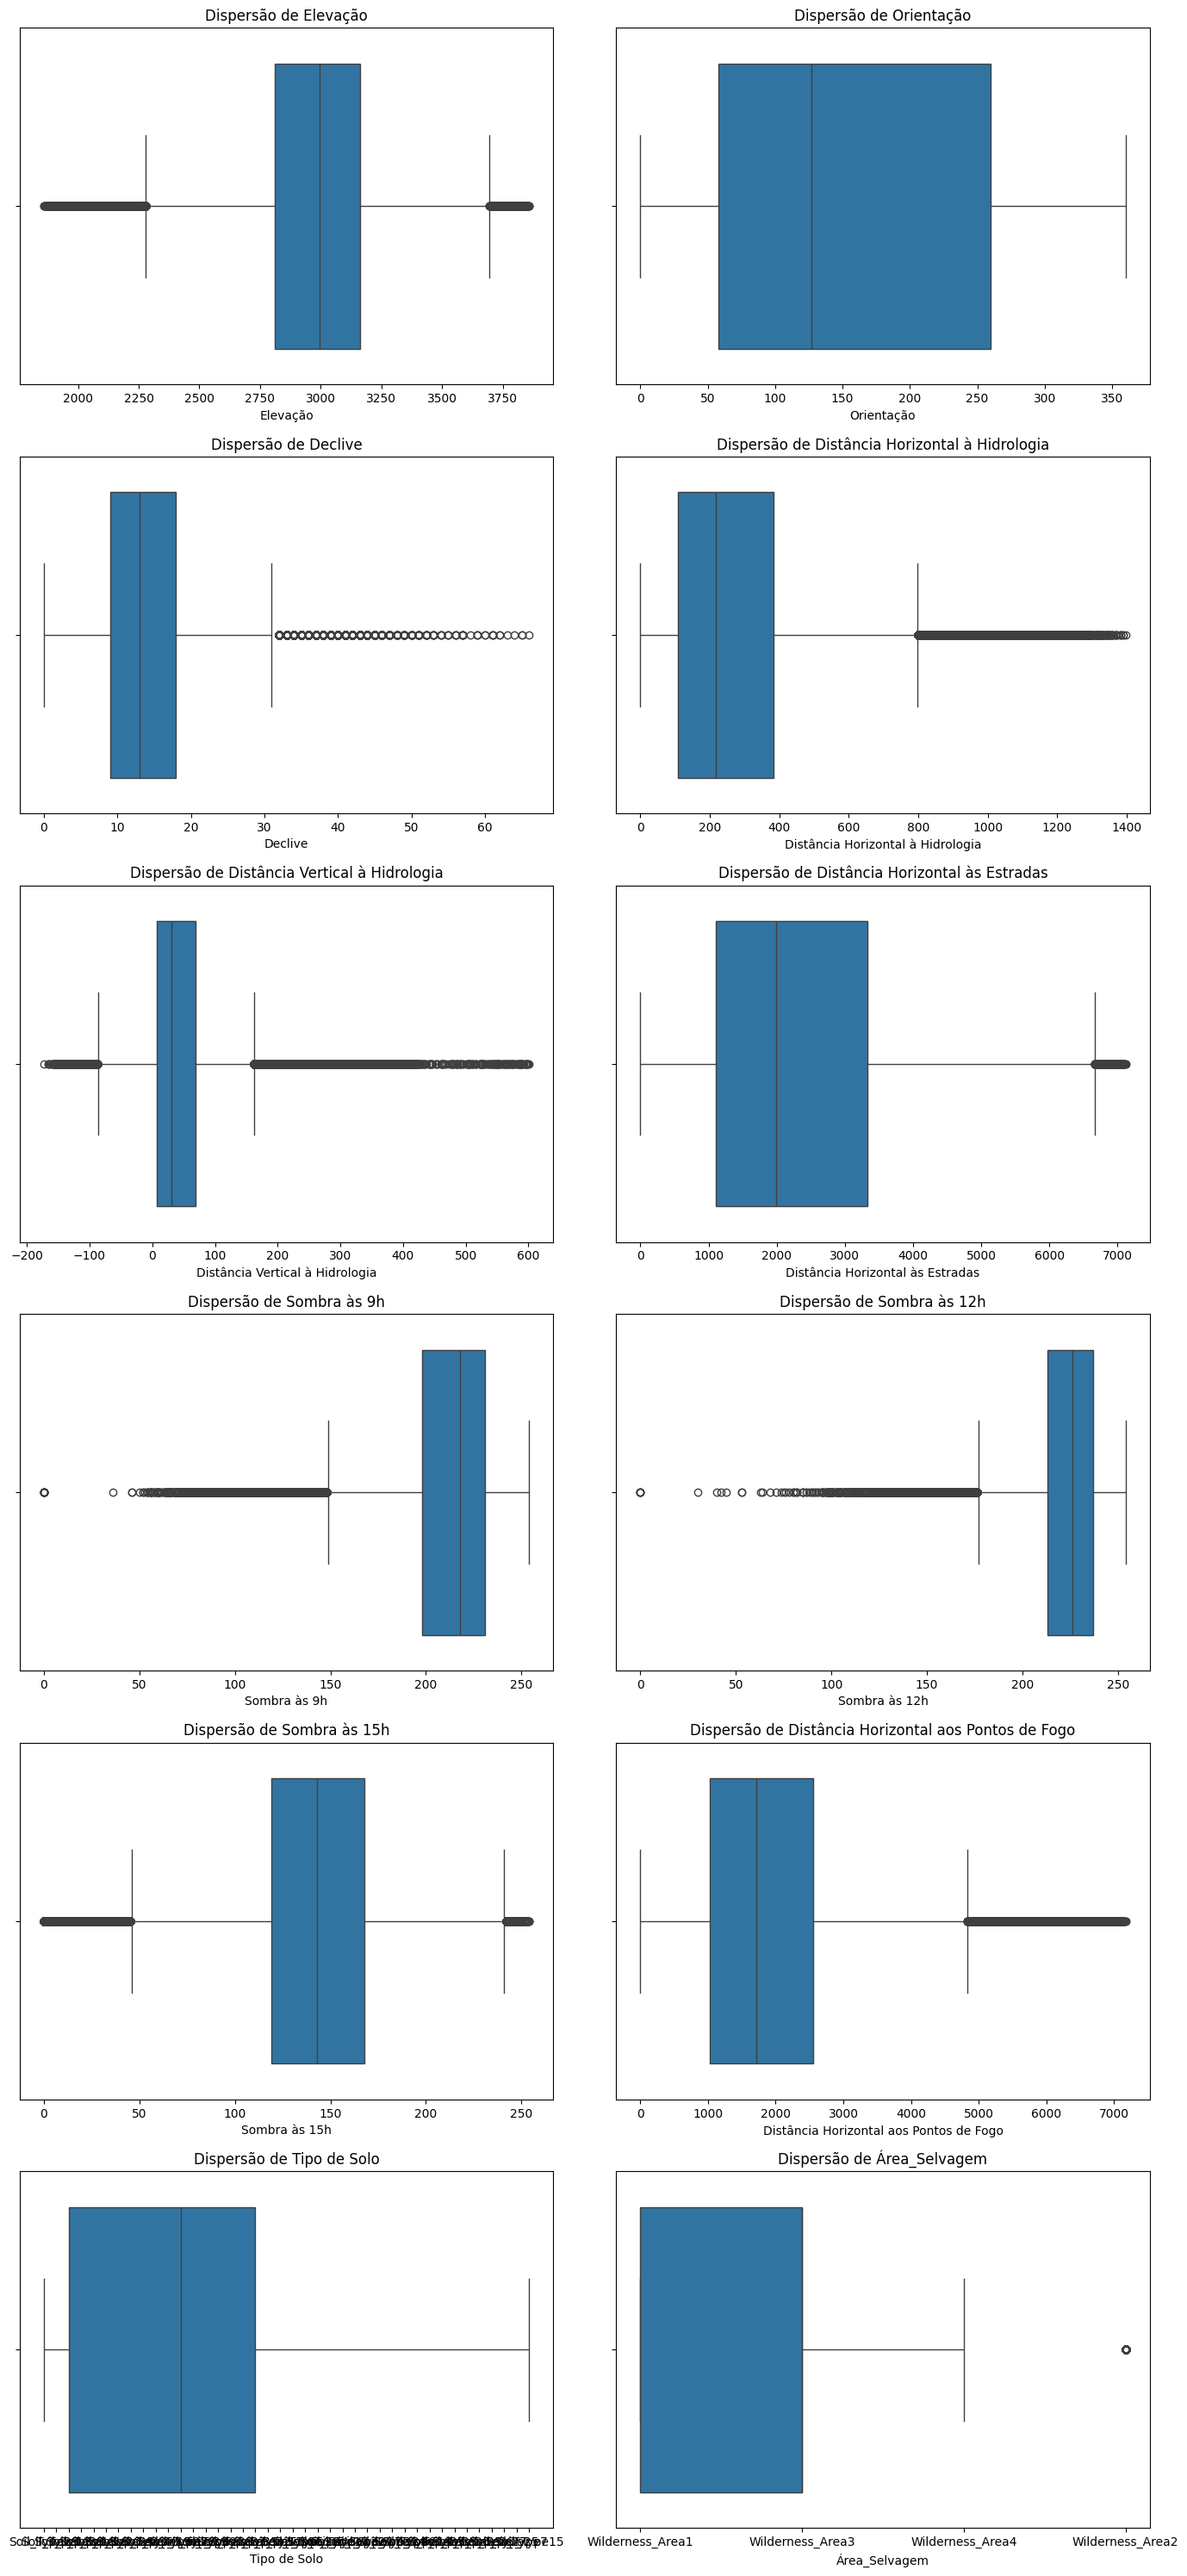

In [ ]:
def grafico(df, colunas):
    numLinhas = (len(colunas) + 1) // 2

    fig, axes = plt.subplots(numLinhas, 2, figsize=(14, 5 * numLinhas))
    plt.title('Gráficos de atributos preditores')
    axes = axes.flatten()

    for idx, col in enumerate(colunas):
        sns.boxplot(x=df[col], ax=axes[idx])
        axes[idx].set_title(f'Dispersão de {traducao[col]}')
        axes[idx].set_xlabel(traducao[col])

    plt.tight_layout()
    plt.show()

grafico(preditores,preditores.columns)

Text(0, 0.5, 'Frequência')

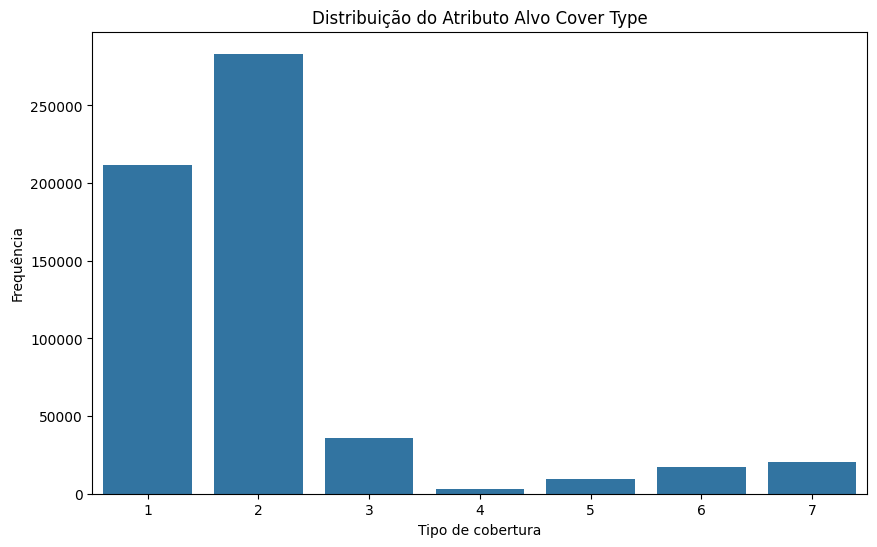

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Cover_Type'])
plt.title('Distribuição do Atributo Alvo Cover Type')
plt.xlabel('Tipo de cobertura')
plt.ylabel('Frequência')

In [ ]:
df = df.drop(columns=['Soil_Type','Wilderness_Area'])

statistics = df.describe().transpose()
statistics['median'] = df.median()
statistics['var'] = df.var()
statistics['range'] = statistics['max'] - statistics['min']

statistics = statistics[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'var', 'range']]
statistics.columns = ['Média', 'Desvio Padrão', 'Min', '1° Quartil', '2° Quartil', '3° Quartil', 'Máx', 'Variância', 'Amplitude']
table = PrettyTable()
table.field_names = ['Atributo'] + list(statistics.columns)
for row in statistics.itertuples():
    table.add_row([row.Index] + list(row[1:]))

print(table)

+------------------------------------+--------------------+--------------------+--------+------------+------------+------------+--------+--------------------+-----------+
|              Atributo              |       Média        |   Desvio Padrão    |  Min   | 1° Quartil | 2° Quartil | 3° Quartil |  Máx   |     Variância      | Amplitude |
+------------------------------------+--------------------+--------------------+--------+------------+------------+------------+--------+--------------------+-----------+
|             Elevation              | 2959.365300544567  | 279.98473425063816 | 1859.0 |   2809.0   |   2996.0   |   3163.0   | 3858.0 | 78391.45141340046  |   1999.0  |
|               Aspect               | 155.65680743254873 | 111.91372100329545 |  0.0   |    58.0    |   127.0    |   260.0    | 360.0  | 12524.680948803452 |   360.0   |
|               Slope                | 14.103703537964792 | 7.488241814480137  |  0.0   |    9.0     |    13.0    |    18.0    |  66.0  | 56.0737

In [ ]:
for col in df.columns:
  target_distribution = df[col].value_counts(normalize=True) * 100
  print("Proporções do atributo (em %):")
  print(target_distribution)

Proporções do atributo (em %):
Elevation
2968    0.289323
2962    0.288118
2991    0.287602
2972    0.286053
2975    0.285020
          ...   
3779    0.000172
1912    0.000172
3659    0.000172
3771    0.000172
3852    0.000172
Name: proportion, Length: 1978, dtype: float64
Proporções do atributo (em %):
Aspect
45     1.085692
0      0.845766
90     0.804975
135    0.659883
63     0.633378
         ...   
269    0.107571
244    0.101031
224    0.087089
226    0.085885
360    0.008778
Name: proportion, Length: 361, dtype: float64
Proporções do atributo (em %):
Slope
11    5.821567
10    5.819501
12    5.717094
13    5.579747
9     5.516065
        ...   
65    0.000344
58    0.000172
64    0.000172
63    0.000172
66    0.000172
Name: proportion, Length: 67, dtype: float64
Proporções do atributo (em %):
Horizontal_Distance_To_Hydrology
30      5.875782
0       4.234508
150     3.577379
60      3.302686
67      2.620084
          ...   
1397    0.000172
1370    0.000172
1355    0.000172
1



---


**2.** Analisando o atributo alvo Cover_Type, nota-se que é significativamente desbalanceado, com duas classes sendo muito mais representadas do que as outras. O tipo de cobertura mais comum é 2 , com uma baixa dispersão no conjunto (desvio padrão de 1.3965). Os valores variam de 1 a 7, indicando a presença de até 7 tipos diferentes de cobertura. Outros tipos de cobertura além do tipo 2 e do tipo 1 são muito menos frequentes, com proporções que variam de 0.47% a 6.15%. Tal balanceamento pode influenciar os modelos de aprendizado, os quais podem ter um viés a favor das classes mais frequentes.

**3.** Este problema se encaixa em uma tarefa de classificação, no qual o objetivo é prever o tipo de cobertura (atributo Cover_Type) em uma área do Roosevelt National Forest com base nos atributos preditores.


**3.1.** Como métricas de desempenho, podem ser analisadas:


*  Acurácia: valor que fornece proporção de previsões corretas sobre o total de previsões.
* Matriz de Confusão: tabela de representação utilizada para avaliar o desempenho do modelo em detalhes para cada classe.
* F1-Score: resultado utilizado para mensurar a harmonia entre a precisão e o recall, especialmente útil em conjuntos de dados desbalanceados.
* Precisão: é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas.
* Recall: mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo


**3.2.** O F1-Score foi a métrica de desempenho utilizada como referência para equipe no trabalho, pois combina precisão e recall em uma única métrica, sendo mais informativa quando há uma distribuição desigual das classes. Diferente da acurácia, que foi debatida como opção de referência pela equipe, o F1-Score é menos influenciado pelo desequilíbrio de classes, pois foca na performance sobre a classe positiva, garantindo que um modelo não negligencie classes minoritárias.

